In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow.keras.utils as utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
# Matplotlib config
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# Global variables
file_train = 'Pima-Diabetes.csv'
file_pred = 'Test-Group-2.csv'

epochs = 600
batch = 20

In [4]:
# Downloading and unzipping data
! wget --no-check-certificate "https://clearskiesrbest.files.wordpress.com/2020/09/dados_dia.zip"
! unzzip dados_dia.zip > quiet.txt; rm quiet.txt; ls -lt

--2020-11-25 01:32:14--  https://clearskiesrbest.files.wordpress.com/2020/09/dados_dia.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving clearskiesrbest.files.wordpress.com (clearskiesrbest.files.wordpress.com)... 192.0.72.20, 192.0.72.21
Connecting to clearskiesrbest.files.wordpress.com (clearskiesrbest.files.wordpress.com)|192.0.72.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9294 (9.1K) [application/zip]
Saving to: 'dados_dia.zip.20'

dados_dia.zip.20    100%[===================>]   9.08K  --.-KB/s    in 0s      

2020-11-25 01:32:14 (59.9 MB/s) - 'dados_dia.zip.20' saved [9294/9294]

total 732
-rw-r--r-- 1 david david  24496 Nov 25 01:32 Pima-Diabetes.csv
-rw-r--r-- 1 david david    289 Nov 25 01:32 Test-Group-2.csv
-rw-r--r-- 1 david david 351842 Oct 19 18:44 Diabetes.ipynb
-rw-r--r-- 1 david david  16242 Oct 15 07:59 diab_mxcf_drop.pdf
-rw-r--r-- 1 david david  16167 Oct 15 07:59 diab_mxcf_nodrop.pdf
-rw-r--r-- 1 david david 

In [5]:
## Exporting Data set
data_df = pd.read_csv(file_train, names=['pregnancies','glucose','diastolic','triceps','insulin',\
                      'bmi','dpf','age','diabetes'])

data_df = data_df.sample(frac=1).reset_index(drop=True)

label = data_df['diabetes']
data_train = np.array(data_df.drop('diabetes',axis=1))


# Splitting data set in train and validation!
train_data, valid_data, train_label, valid_label = train_test_split(data_train, label, test_size=0.20, \
                                                                    random_state=0)

data_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,3,100,68,23,81,31.6,0.949,28,0
1,0,123,88,37,0,35.2,0.197,29,0
2,0,107,76,0,0,45.3,0.686,24,0
3,0,102,86,17,105,29.3,0.695,27,0
4,0,104,64,23,116,27.8,0.454,23,0
...,...,...,...,...,...,...,...,...,...
753,0,165,76,43,255,47.9,0.259,26,0
754,0,95,80,45,92,36.5,0.330,26,0
755,0,93,60,25,92,28.7,0.532,22,0
756,5,105,72,29,325,36.9,0.159,28,0


In [7]:
# Defining model
def diabetes_NN(dim,dropout=False):
    model = Sequential()
    if dropout == False:
        model.add(Dense(64, activation='relu')) # 50
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(64, activation='relu')) 
        model.add(Dropout(0.25, noise_shape=None, seed=None))
        model.add(Dense(1, activation='sigmoid'))
    return model

model_nodrop = diabetes_NN(train_data.shape[1],dropout=False)
model_drop = diabetes_NN(train_data.shape[1],dropout=True)

In [32]:
# Compile the models
model_nodrop.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_drop.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Trainning models
train_nodrop = model_nodrop.fit(
    train_data,
    train_label,
    epochs=epochs,
    batch_size=batch,
    verbose=0,
    validation_data=(valid_data,valid_label)
)

print('Model w/o dropout trainning finished')

train_drop = model_drop.fit(
    train_data,
    train_label,
    epochs=epochs,
    batch_size=batch,
    verbose=0,
    validation_data=(valid_data,valid_label)
)

print('Model w dropout trainning finished')

Model w/o dropout trainning finished
Model w dropout trainning finished


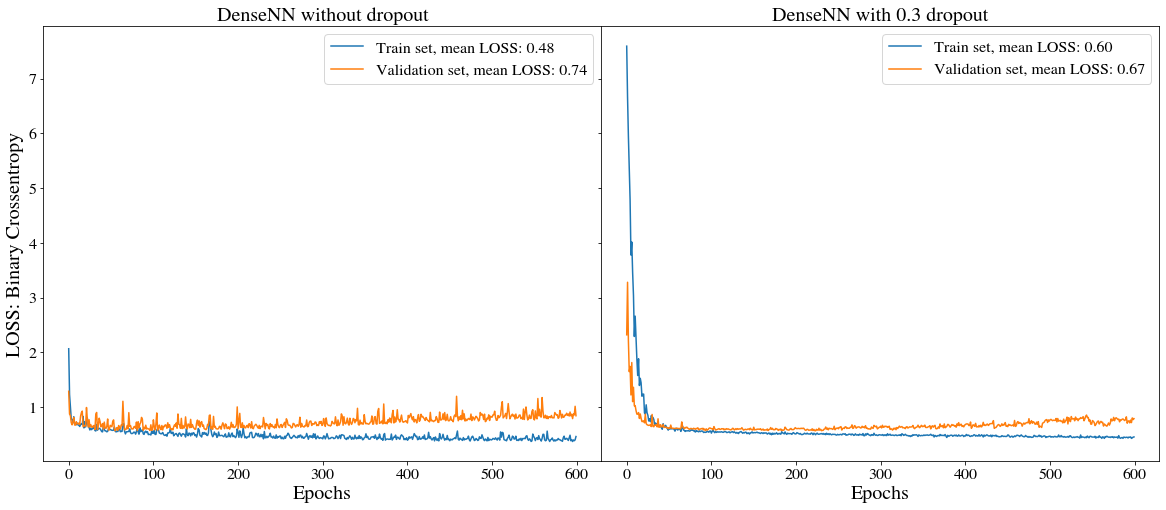

In [33]:
plt.rcParams["figure.figsize"] = (20,8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(train_nodrop.history['loss'],label=r'Train set, mean LOSS: %.2f'%np.mean(train_nodrop.history['loss']))
ax1.plot(train_nodrop.history['val_loss'],label=r'Validation set, mean LOSS: %.2f'%np.mean(train_nodrop.history['val_loss']))
fig.subplots_adjust(wspace=0)

ax1.set_title(r'DenseNN without dropout' , fontsize=20)
ax1.set_xlabel(r'Epochs', fontsize=20)
ax1.set_ylabel(r'LOSS: Binary Crossentropy', fontsize=20)
ax1.legend(loc=0)


ax2.plot(train_drop.history['loss'],label=r'Train set, mean LOSS: %.2f'%np.mean(train_drop.history['loss']))
ax2.plot(train_drop.history['val_loss'],label=r'Validation set, mean LOSS: %.2f'%np.mean(train_drop.history['val_loss']))

ax2.set_title(r'DenseNN with 0.3 dropout' , fontsize=20)
ax2.set_xlabel(r'Epochs', fontsize=20)
ax2.legend(loc=0)


plt.savefig('diab_loss.pdf')

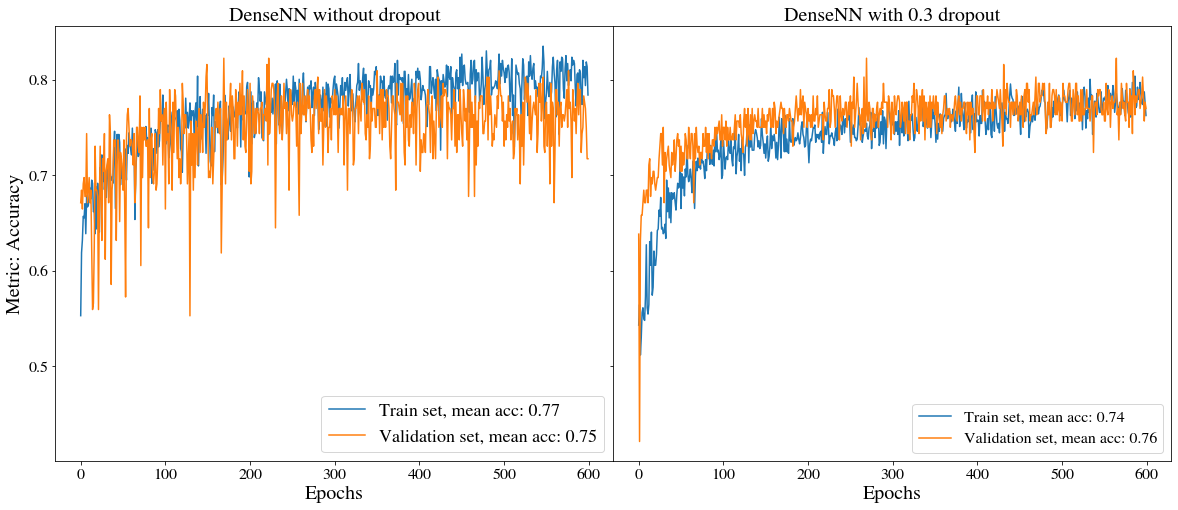

In [34]:
plt.rcParams["figure.figsize"] = (20,8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(train_nodrop.history['accuracy'],label=r'Train set, mean acc: %.2f'%np.mean(train_nodrop.history['accuracy']))
ax1.plot(train_nodrop.history['val_accuracy'],label=r'Validation set, mean acc: %.2f'%np.mean(train_nodrop.history['val_accuracy']))
fig.subplots_adjust(wspace=0)

ax1.set_title(r'DenseNN without dropout' , fontsize=20)
ax1.set_xlabel(r'Epochs', fontsize=20)
ax1.set_ylabel(r'Metric: Accuracy', fontsize=20)
ax1.legend(loc='lower right',fontsize=18)


ax2.plot(train_drop.history['accuracy'],label=r'Train set, mean acc: %.2f'%np.mean(train_drop.history['accuracy']))
ax2.plot(train_drop.history['val_accuracy'],label=r'Validation set, mean acc: %.2f'%np.mean(train_drop.history['val_accuracy']))

ax2.set_title(r'DenseNN with 0.3 dropout' , fontsize=20)
ax2.set_xlabel(r'Epochs', fontsize=20)
ax2.legend(loc=0)

plt.savefig('diab_acc.pdf')

In [35]:
# Matrix confussion 
train_pred_nodrop = np.round_(model_nodrop.predict(train_data)).flatten()
valid_pred_nodrop = np.round_(model_nodrop.predict(valid_data)).flatten()

train_pred_drop = np.round_(model_drop.predict(train_data)).flatten()
valid_pred_drop = np.round_(model_drop.predict(valid_data)).flatten()

train_maxcf_nodrop = confusion_matrix(train_pred_nodrop, train_label,normalize='true') # tn, fp, fn, tp
valid_maxcf_nodrop = confusion_matrix(valid_pred_nodrop, valid_label,normalize='true')

train_maxcf_drop = confusion_matrix(train_pred_drop, train_label,normalize='true')
valid_maxcf_drop = confusion_matrix(valid_pred_drop, valid_label,normalize='true')

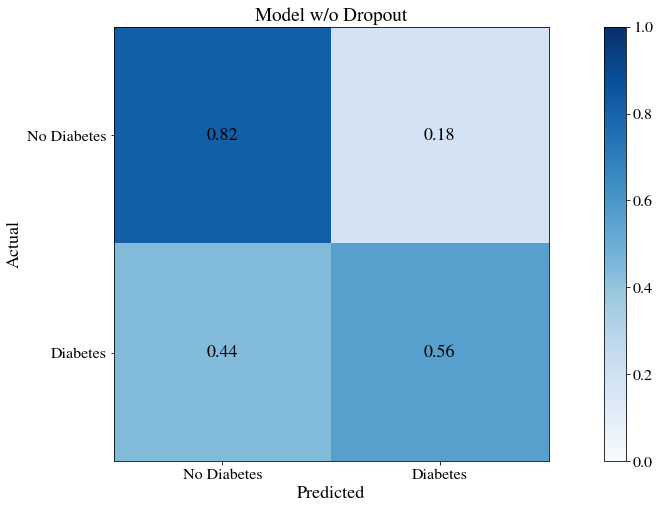

In [36]:
plt.imshow(valid_maxcf_nodrop,cmap=plt.cm.Blues,interpolation='nearest',vmin=0.,vmax=1.)

for i in range(2):
    for j in range(2):
        plt.text(j,i,'%.2f'%valid_maxcf_nodrop[i,j], ha='center', va='center', fontsize=18)

plt.colorbar()
class_labels = ['Diabetes','No_Diabetes']

plt.xticks([0.,1.], ('No Diabetes', 'Diabetes'))
plt.yticks([0.,1.], ('No Diabetes', 'Diabetes'))

plt.title('Model w/o Dropout')
plt.xlabel('Predicted',size=18)
plt.ylabel('Actual',size=18)

plt.savefig('diab_mxcf_nodrop.pdf')

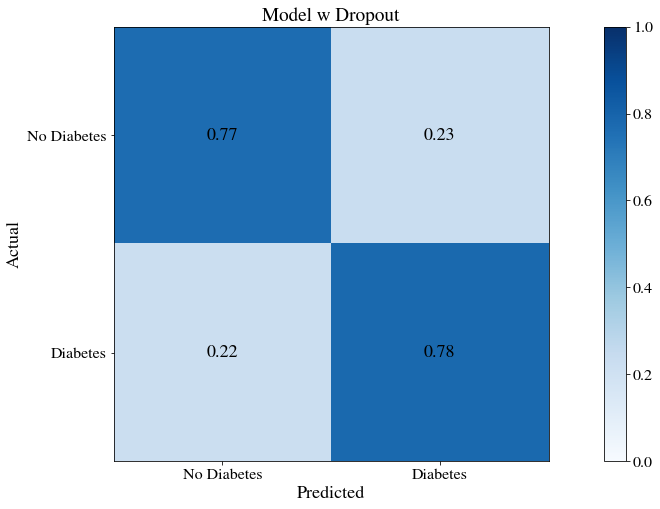

In [37]:
plt.imshow(valid_maxcf_drop,cmap=plt.cm.Blues,interpolation='nearest',vmin=0.,vmax=1.)

for i in range(2):
    for j in range(2):
        plt.text(j,i,'%.2f'%valid_maxcf_drop[i,j], ha='center', va='center', fontsize=18)

plt.colorbar()
class_labels = ['Diabetes','No_Diabetes']

plt.xticks([0.,1.], ('No Diabetes', 'Diabetes'))
plt.yticks([0.,1.], ('No Diabetes', 'Diabetes'))

plt.title('Model w Dropout')
plt.xlabel('Predicted',size=18)
plt.ylabel('Actual',size=18)

plt.savefig('diab_mxcf_drop.pdf')

In [13]:
# Importing Data set
data_pred = pd.read_csv(file_pred, names=['pregnancies','glucose','diastolic','triceps','insulin',\
                        'bmi','dpf','age'])

# Model's prediction
pred_prob_nodrop = model_nodrop.predict(data_pred)
pred_nodrop = np.round_(pred_prob_nodrop).flatten()

pred_prob_drop = model_drop.predict(data_pred)
pred_drop = np.round_(pred_prob_drop).flatten()

In [14]:
data_pred['pred_lkl_nodrop']=pred_prob_nodrop
data_pred['pred_nodrop']=pred_nodrop

data_pred['pred_lkl_drop']=pred_prob_drop
data_pred['pred_drop']=pred_drop

print(data_pred)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            1      106         76        0        0  37.5  0.197   26   
1            6      190         92        0        0  35.5  0.278   66   
2            2       88         58       26       16  28.4  0.766   22   
3            9      170         74       31        0  44.0  0.403   43   
4            9       89         62        0        0  22.5  0.142   33   
5           10      101         76       48      180  32.9  0.171   63   
6            2      122         70       27        0  36.8  0.340   27   
7            5      121         72       23      112  26.2  0.245   30   
8            1      126         60        0        0  30.1  0.349   47   
9            1       93         70       31        0  30.4  0.315   23   

   pred_lkl_nodrop  pred_nodrop  pred_lkl_drop  pred_drop  
0     1.573376e-01          0.0       0.278705        0.0  
1     9.994075e-01          1.0       0.550514        1.0  
2    

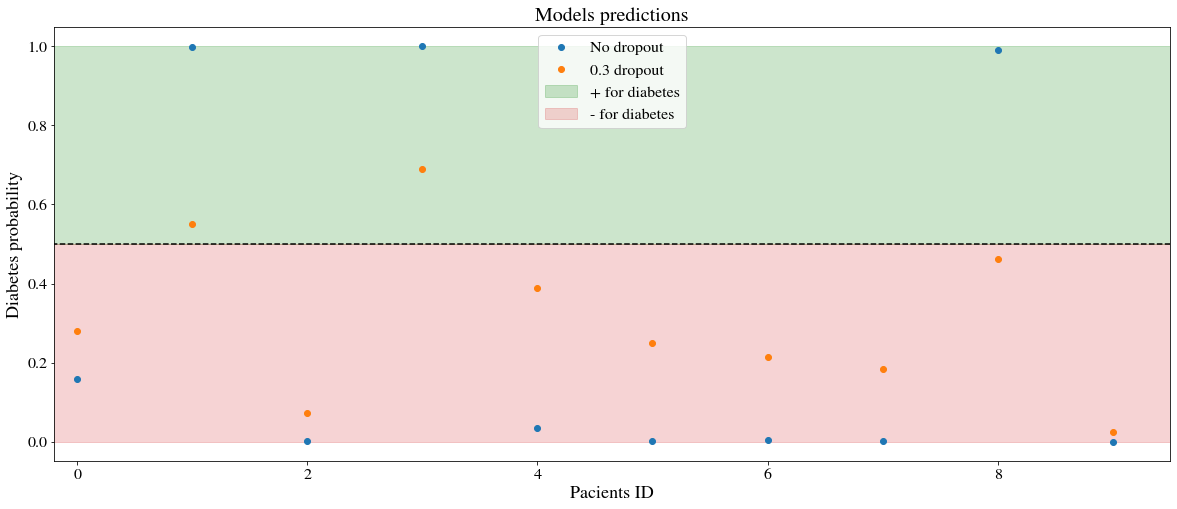

<Figure size 1440x576 with 0 Axes>

In [15]:
xtab=np.arange(-0.5,10.5,0.1)

plt.plot(data_pred['pred_lkl_nodrop'],'o',label=r'No dropout')
plt.plot(data_pred['pred_lkl_drop'],'o',label=r'0.3 dropout')
plt.hlines(0.5,-0.5,10.5,ls='--',color='k')
plt.fill_between(xtab,1.,0.5,color='green',alpha=0.2,label='+ for diabetes')
plt.fill_between(xtab,0.,0.5,color='C3',alpha=0.2,label='- for diabetes')

plt.xlim(-0.2,9.5)
plt.title(r'Models predictions' , fontsize=20)
plt.xlabel(r'Pacients ID', fontsize=18)
plt.ylabel(r'Diabetes probability', fontsize=18)
plt.legend(loc=0)
plt.show()

plt.savefig('diab_predict.pdf')